Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-1.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.303953198013884314102253505320083965771
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Se

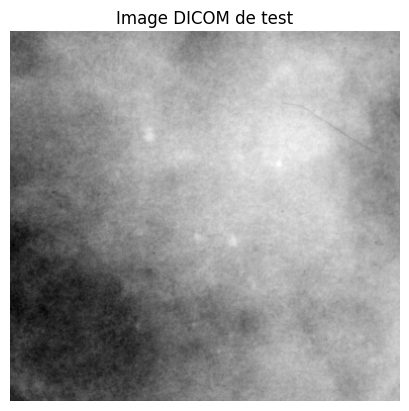

In [49]:
import os
import pydicom
import matplotlib.pyplot as plt

# Chemin vers le dataset
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/"

# Fonction pour parcourir les dossiers et trouver une image DICOM
def find_dicom_image(data_path):
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                return os.path.join(root, file)  # Retourne le chemin complet du premier fichier .dcm trouvé
    return None

# Trouver une image DICOM
dicom_file = find_dicom_image(data_path)
# Charger l'image DICO
dicom_metadata = pydicom.dcmread(dicom_file)

if dicom_file:
    print(f"Fichier DICOM trouvé : {dicom_file}")
    
    # affichage des métadonnées**
    print("Métadonnées du fichier DICOM :")
    print(dicom_metadata)

    # Extraction avec vérification si les attributs existent
    print("\nInformations spécifiques :")
    print(f"Patient ID : {getattr(dicom_metadata, 'PatientID', 'Non disponible')}")
    print(f"Study Date : {getattr(dicom_metadata, 'StudyDate', 'Non disponible')}")
    print(f"Modality : {getattr(dicom_metadata, 'Modality', 'Non disponible')}")
    print(f"Image Dimensions : {dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else 'Non disponible'}")
    print(f"Bits Stored : {getattr(dicom_metadata, 'BitsStored', 'Non disponible')}")
    print(f"Photometric Interpretation : {getattr(dicom_metadata, 'PhotometricInterpretation', 'Non disponible')}")

    
    # Afficher l'image
    plt.imshow(dicom_metadata.pixel_array, cmap="gray")
    plt.title("Image DICOM de test")
    plt.axis("off")
    plt.show()
else:
    print("Aucune image DICOM trouvée dans le dossier spécifié.")


In [32]:
import pandas as pd

def load_metadata_csvs_test(metadata_path):
    """Charge les fichiers CSV contenant des métadonnées et les combine en un seul DataFrame."""
    csv_files = [
        "calc_case_description_train_set.csv",
        "mass_case_description_train_set.csv"
    ]
    all_metadata = []
    for csv_file in csv_files:
        file_path = os.path.join(metadata_path, csv_file)
        try:
            data = pd.read_csv(file_path)
            all_metadata.append(data)
            print(f"Fichier chargé avec succès : {csv_file}")
        except Exception as e:
            print(f"Erreur lors du chargement de {csv_file} : {e}")
    return pd.concat(all_metadata, ignore_index=True)

load_metadata_csvs_test('/Volumes/SSD/Oncologie/P1-Classification/data/metadata/')
##Soucis avec double breast_density




Fichier chargé avec succès : calc_case_description_train_set.csv
Fichier chargé avec succès : mass_case_description_train_set.csv


patient_id  breast density left or right breast image view  \
0       P_00005             3.0                RIGHT         CC   
1       P_00005             3.0                RIGHT        MLO   
2       P_00007             4.0                 LEFT         CC   
3       P_00007             4.0                 LEFT        MLO   
4       P_00008             1.0                 LEFT         CC   
...         ...             ...                  ...        ...   
2859    P_02033             NaN                RIGHT        MLO   
2860    P_02079             NaN                RIGHT         CC   
2861    P_02079             NaN                RIGHT        MLO   
2862    P_02092             NaN                 LEFT         CC   
2863    P_02092             NaN                 LEFT        MLO   

      abnormality id abnormality type    calc type calc distribution  \
0                  1    calcification    AMORPHOUS         CLUSTERED   
1                  1    calcification    AMORPHOUS         CLUSTERED   
2                  1    calcification  PLEOMORPHIC            LINEAR   
3                  1    calcification  PLEOMORPHIC            LINEAR   
4                  1    calcification          NaN          REGIONAL   
...              ...              ...          ...               ...   
2859               1             mass          NaN               NaN   
2860               1             mass          NaN               NaN   
2861               1             mass          NaN               NaN   
2862               1             mass          NaN               NaN   
2863               1             mass          NaN               NaN   

      assessment                pathology  subtlety  \
0              3                MALIGNANT         3   
1              3                MALIGNANT         3   
2              4                   BENIGN         4   
3              4                   BENIGN         4   
4              2  BENIGN_WITHOUT_CALLBACK         3   
...          ...                      ...       ...   
2859           3                MALIGNANT         4   
2860           3                MALIGNANT         5   
2861           3                MALIGNANT         5   
2862           3                MALIGNANT         2   
2863           3                MALIGNANT         2   

                                        image file path  \
0     Calc-Training_P_00005_RIGHT_CC/1.3.6.1.4.1.959...   
1     Calc-Training_P_00005_RIGHT_MLO/1.3.6.1.4.1.95...   
2     Calc-Training_P_00007_LEFT_CC/1.3.6.1.4.1.9590...   
3     Calc-Training_P_00007_LEFT_MLO/1.3.6.1.4.1.959...   
4     Calc-Training_P_00008_LEFT_CC/1.3.6.1.4.1.9590...   
...                                                 ...   
2859  Mass-Training_P_02033_RIGHT_MLO/1.3.6.1.4.1.95...   
2860  Mass-Training_P_02079_RIGHT_CC/1.3.6.1.4.1.959...   
2861  Mass-Training_P_02079_RIGHT_MLO/1.3.6.1.4.1.95...   
2862  Mass-Training_P_02092_LEFT_CC/1.3.6.1.4.1.9590...   
2863  Mass-Training_P_02092_LEFT_MLO/1.3.6.1.4.1.959...   

                                cropped image file path  \
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...   
1     Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....   
2     Calc-Training_P_00007_LEFT_CC_1/1.3.6.1.4.1.95...   
3     Calc-Training_P_00007_LEFT_MLO_1/1.3.6.1.4.1.9...   
4     Calc-Training_P_00008_LEFT_CC_1/1.3.6.1.4.1.95...   
...                                                 ...   
2859  Mass-Training_P_02033_RIGHT_MLO_1/1.3.6.1.4.1....   
2860  Mass-Training_P_02079_RIGHT_CC_1/1.3.6.1.4.1.9...   
2861  Mass-Training_P_02079_RIGHT_MLO_1/1.3.6.1.4.1....   
2862  Mass-Training_P_02092_LEFT_CC_1/1.3.6.1.4.1.95...   
2863  Mass-Training_P_02092_LEFT_MLO_1/1.3.6.1.4.1.9...   

                                     ROI mask file path  breast_density  \
0     Calc-Training_P_00005_RIGHT_CC_1/1.3.6.1.4.1.9...             NaN   
1     Calc-Training_P_00005_RIGHT_MLO_1/1.3.6.1.4.1....             NaN   
2     Calc-Training_P_00007_LEF

In [81]:
import pandas as pd
import os

def load_metadata_csvs(metadata_path):
    """
    Charge les fichiers CSV contenant des métadonnées, les combine en un seul DataFrame,
    fusionne les colonnes `breast_density` et réorganise les colonnes `mass shape` et `mass margins`.
    """
    csv_files = [
        "calc_case_description_train_set.csv",
        "mass_case_description_train_set.csv"
    ]
    all_metadata = []

    # Charger les fichiers CSV
    for csv_file in csv_files:
        file_path = os.path.join(metadata_path, csv_file)
        try:
            data = pd.read_csv(file_path)
            all_metadata.append(data)
            print(f"Fichier chargé avec succès : {csv_file}")
        except Exception as e:
            print(f"Erreur lors du chargement de {csv_file} : {e}")
    
    # Combiner les DataFrames
    combined_df = pd.concat(all_metadata, ignore_index=True)
    # print(combined_df.columns)
    # Fusionner les colonnes `breast_density` si elles existent
    if 'breast density' in combined_df.columns and 'breast_density' in combined_df.columns:
        combined_df['breast density'] = combined_df['breast density'].combine_first(combined_df['breast_density'])
        combined_df.drop(columns=['breast_density'], inplace=True)
        if combined_df['breast density'].isna().any() == False:
             print("Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.")
    else:
        print( "pas la")

    # Vérifiez les colonnes avant nettoyage
    # print("Colonnes avant nettoyage :")
    # print(combined_df.columns.tolist())

    # Renommer explicitement les colonnes problématiques pour utiliser des underscores
    combined_df.rename(columns={
        'mass shape': 'mass_shape',
        'mass margins': 'mass_margins'
    }, inplace=True)

    # Vérifiez les colonnes après le renommage
    # print("Colonnes après renommage :")
    # print(combined_df.columns.tolist())

    # Réorganiser les colonnes mass_shape et mass_margins après calc_distribution
    if 'calc distribution' in combined_df.columns and 'mass_shape' in combined_df.columns and 'mass_margins' in combined_df.columns:
        # print("'calc distribution', 'mass_shape' et 'mass_margins' existent dans le DataFrame.")
        calc_distribution_idx = combined_df.columns.tolist().index('calc distribution')
        columns_order = combined_df.columns.tolist()
        columns_order.remove('mass_shape')
        columns_order.remove('mass_margins')
        columns_order = (
            columns_order[:calc_distribution_idx + 1]
            + ['mass_shape', 'mass_margins']
            + columns_order[calc_distribution_idx + 1:]
        )
        combined_df = combined_df[columns_order]
        # print("Les colonnes 'mass_shape' et 'mass_margins' ont été déplacées après 'calc_distribution'.")
    else:
        print("Les colonnes 'calc_distribution', 'mass_shape' ou 'mass_margins' sont absentes du DataFrame.")

    return combined_df

# Exemple d'appel de la fonction
metadata_path = '/Volumes/SSD/Oncologie/P1-Classification/data/metadata/'
load_metadata_csvs(metadata_path)

Fichier chargé avec succès : calc_case_description_train_set.csv
Fichier chargé avec succès : mass_case_description_train_set.csv
Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.


patient_id  breast density left or right breast image view  \
0       P_00005             3.0                RIGHT         CC   
1       P_00005             3.0                RIGHT        MLO   
2       P_00007             4.0                 LEFT         CC   
3       P_00007             4.0                 LEFT        MLO   
4       P_00008             1.0                 LEFT         CC   
5       P_00008             1.0                 LEFT         CC   
6       P_00008             1.0                 LEFT         CC   
7       P_00008             1.0                 LEFT        MLO   
8       P_00008             1.0                 LEFT        MLO   
9       P_00008             1.0                 LEFT        MLO   
10      P_00008             1.0                RIGHT         CC   
11      P_00008             1.0                RIGHT         CC   
12      P_00008             1.0                RIGHT         CC   
13      P_00008             1.0                RIGHT         CC   
14      P_00008             1.0                RIGHT         CC   
15      P_00008             1.0                RIGHT        MLO   
16      P_00008             1.0                RIGHT        MLO   
17      P_00008             1.0                RIGHT        MLO   
18      P_00008             1.0                RIGHT        MLO   
19      P_00008             1.0                RIGHT        MLO   
20      P_00010             3.0                 LEFT         CC   
21      P_00010             3.0                 LEFT        MLO   
22      P_00011             3.0                 LEFT         CC   
23      P_00011             3.0                 LEFT        MLO   
24      P_00012             2.0                 LEFT         CC   
25      P_00012             2.0                 LEFT        MLO   
26      P_00013             4.0                RIGHT        MLO   
27      P_00014             4.0                 LEFT         CC   
28      P_00014             4.0                 LEFT        MLO   
29      P_00016             4.0                 LEFT         CC   
30      P_00016             4.0                 LEFT        MLO   
31      P_00019             4.0                RIGHT        MLO   
32      P_00019             4.0                RIGHT         CC   
33      P_00020             2.0                 LEFT         CC   
34      P_00020             2.0                 LEFT        MLO   
35      P_00022             3.0                 LEFT         CC   
36      P_00022             3.0                 LEFT        MLO   
37      P_00024             4.0                 LEFT         CC   
38      P_00024             4.0                 LEFT        MLO   
39      P_00028             4.0                 LEFT        MLO   
40      P_00029             3.0                 LEFT         CC   
41      P_00029             3.0                 LEFT        MLO   
42      P_00030             2.0                 LEFT         CC   
43      P_00030             2.0                 LEFT         CC   
44      P_00030             2.0                 LEFT        MLO   
45      P_00030             2.0                 LEFT        MLO   
46      P_00030             2.0                RIGHT         CC   
47      P_00030             2.0                RIGHT        MLO   
48      P_00031             4.0                 LEFT         CC   
49      P_00034             3.0                RIGHT         CC   
50      P_00034             3.0                RIGHT        MLO   
51      P_00043             3.0                 LEFT        MLO   
52      P_00047             2.0                 LEFT         CC   
53      P_00047             2.0                 LEFT         CC   
54      P_00047             2.0                 LEFT         CC   
55      P_00047             2.0                 LEFT        MLO   
56      P_00047             2.0                 LEFT        MLO   
57      P_00047             2.0                 LEFT        MLO   
58      P_00048             1.0                RIGHT

2 fichiers DICOM trouvés.
Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-1.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.303953198013884314102253505320083965771
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID   

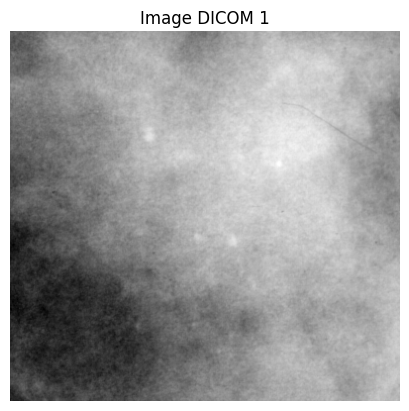

Fichier DICOM trouvé : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-2.dcm
Métadonnées du fichier DICOM :
Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 194
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.125682117812365200531525121433222097263
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008,0005) Specific Character Set              CS: 'ISO_IR 100'
(0008,0016) SOP Class UID                       UI: Se

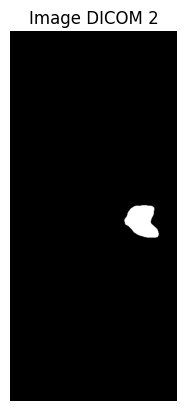

In [50]:
# Fonction pour trouver plusieurs fichiers DICOM
def find_multiple_dicom_images(data_path, max_files=5):
    dicom_files = []
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_files.append(os.path.join(root, file))
                if len(dicom_files) >= max_files:  # Limite au nombre maximum d'images
                    return dicom_files
    return dicom_files

# Trouver plusieurs fichiers DICOM
dicom_files = find_multiple_dicom_images(data_path, max_files=5)

if dicom_files:
    print(f"{len(dicom_files)} fichiers DICOM trouvés.")
    
    # Parcourir et afficher chaque image DICOM
    for i, dicom_file in enumerate(dicom_files, 1):
        print(f"Fichier DICOM trouvé : {dicom_file}")
        dicom_metadata = pydicom.dcmread(dicom_file)
    
        # affichage des métadonnées
        print("Métadonnées du fichier DICOM :")
        print(dicom_metadata)

        print("\nInformations spécifiques :")
        print(f"Patient ID : {dicom_metadata.PatientID}")
        print(f"Study Date : {dicom_metadata.StudyDate}")
        print(f"Modality : {dicom_metadata.Modality}")
        print(f"Image Dimensions : {dicom_metadata.pixel_array.shape}")
        print(f"Bits Stored : {dicom_metadata.BitsStored}")
        print(f"Photometric Interpretation : {dicom_metadata.PhotometricInterpretation}")
            
        # Afficher l'image
        plt.figure()
        plt.imshow(dicom_metadata.pixel_array, cmap="gray")
        plt.title(f"Image DICOM {i}")
        plt.axis("off")
        plt.show()
else:
    print("Aucune image DICOM trouvée.")


In [51]:
import os
import pydicom
import pandas as pd
import psutil  # Pour mesurer l'utilisation de la mémoire

# Fonction pour surveiller l'utilisation de la mémoire
def memory_usage():
    process = psutil.Process(os.getpid())
    return process.memory_info().rss / (1024 ** 2)  # Convertir en Mo

# Fonction pour collecter les caractéristiques des images DICOM
def collect_image_metadata(data_path, max_files=10):
    metadata_list = []
    count = 0
    for root, dirs, files in os.walk(data_path):
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                dicom_metadata = pydicom.dcmread(dicom_path, force=True)
                try:
                    # Extraire les caractéristiques clés
                    metadata_list.append({
                        "File": dicom_path,
                        "Patient ID": getattr(dicom_metadata, "PatientID", "Non disponible"),
                        "Study Date": getattr(dicom_metadata, "StudyDate", "Non disponible"),
                        "Modality": getattr(dicom_metadata, "Modality", "Non disponible"),
                        "Image Dimensions": dicom_metadata.pixel_array.shape if hasattr(dicom_metadata, 'pixel_array') else "Non disponible",
                        "Bits Stored": getattr(dicom_metadata, "BitsStored", "Non disponible"),
                        "Photometric Interpretation": getattr(dicom_metadata, "PhotometricInterpretation", "Non disponible")
                    })
                except Exception as e:
                    print(f"Erreur lors de la lecture du fichier {dicom_path}: {e}")
                
                count += 1
                if count >= max_files:
                    # On retourne immédiatement le DataFrame après avoir atteint la limite
                    return pd.DataFrame(metadata_list)
    return pd.DataFrame(metadata_list)

# Chemin vers le dataset
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/"

# Configurer pandas pour afficher toutes les informations des colonnes
pd.set_option('display.max_colwidth', None)  # Afficher les colonnes complètes
pd.set_option('display.max_rows', None)  # Afficher toutes les lignes si nécessaire

# Mesurer la mémoire avant la collecte
print(f"Utilisation mémoire initiale : {memory_usage():.2f} Mo")

# Collecter les métadonnées de plusieurs images
image_metadata = collect_image_metadata(data_path, max_files=11)  # Modifie max_files si nécessaire

# Mesurer la mémoire après la collecte
print(f"Utilisation mémoire après collecte : {memory_usage():.2f} Mo")

# Afficher toutes les données collectées
print(image_metadata)


Utilisation mémoire initiale : 154.47 Mo
Utilisation mémoire après collecte : 168.00 Mo
                                                                                                                                                                                           File  \
0  /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-1.dcm   
1  /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384/1-2.dcm   

                        Patient ID Study Date Modality Image Dimensions  \
0  Calc-Training_P_01548_LEFT_CC_1   20170830       MG       (366, 386)   
1  Calc-Training_P_01548_LEFT_CC_1   20170906       MG     (3721, 1681)   

   Bits Stored Photometric Interpretation  
0           16                MONOCHROME2  
1           

In [53]:
def extract_dicom_metadata(dicom_data):
    """Extrait les métadonnées d'un fichier DICOM en dictionnaire."""
    return {
        "Patient ID": getattr(dicom_data, "PatientID", "Non disponible"),
        "Study Date": getattr(dicom_data, "StudyDate", "Non disponible"),
        "Modality": getattr(dicom_data, "Modality", "Non disponible"),
        "Image Dimensions": dicom_data.pixel_array.shape if hasattr(dicom_data, "pixel_array") else "Non disponible",
        "Bits Stored": getattr(dicom_data, "BitsStored", "Non disponible"),
        "Photometric Interpretation": getattr(dicom_data, "PhotometricInterpretation", "Non disponible")
    }
extract_dicom_metadata(dicom_metadata)

metadata_list = []
max_files = 20  # Limiter à 100 fichiers pour accélérer

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".dcm"):
            dicom_path = os.path.join(root, file)
            dicom_data = pydicom.dcmread(dicom_path, force=True)
            try:
                metadata_list.append(extract_dicom_metadata(dicom_data))
            except Exception as e:
                print(f"Erreur lors de l'extraction des métadonnées pour {dicom_path}: {e}")

            if len(metadata_list) >= max_files:  # Arrêter après `max_files`
                break
    if len(metadata_list) >= max_files:
        break

dicom_metadata_df = pd.DataFrame(metadata_list)


print("Colonnes dans dicom_metadata_df :")
print(dicom_metadata_df.columns)
print("\nAperçu des métadonnées DICOM :")
print(dicom_metadata_df)

# Chargement des métadonnées CSV
csv_path = "/Volumes/SSD/Oncologie/P1-Classification/data/metadata"
csv_files = ["calc_case_description_test_set.csv", "calc_case_description_train_set.csv", 
             "mass_case_description_test_set.csv", "mass_case_description_train_set.csv"]

csv_metadata = pd.concat(
    [pd.read_csv(os.path.join(csv_path, file)) for file in csv_files],
    ignore_index=True
)

# Harmoniser les colonnes de dicom_metadata_df
dicom_metadata_df.columns = (
    dicom_metadata_df.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")                 # Remplacer les espaces par des underscores
)

# Renommer spécifiquement "patient id" en "patient_id" pour éviter tout problème
dicom_metadata_df = dicom_metadata_df.rename(columns={"patient_id": "patient_id"})

# Harmoniser les colonnes de csv_metadata
csv_metadata.columns = (
    csv_metadata.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")            # Remplacer les espaces par des underscores
)

# Vérifier les colonnes harmonisées
print("Colonnes harmonisées de dicom_metadata_df :", dicom_metadata_df.columns)
print("Colonnes harmonisées de csv_metadata :", csv_metadata.columns)

# Réaliser le merge après harmonisation
merged_metadata = pd.merge(dicom_metadata_df, csv_metadata, how="left", on="patient_id")

# Afficher un aperçu des données fusionnées
print("\nAperçu des métadonnées fusionnées :")
print(merged_metadata.head())


Colonnes dans dicom_metadata_df :
Index(['Patient ID', 'Study Date', 'Modality', 'Image Dimensions',
       'Bits Stored', 'Photometric Interpretation'],
      dtype='object')

Aperçu des métadonnées DICOM :
                        Patient ID Study Date Modality Image Dimensions  \
0  Calc-Training_P_01548_LEFT_CC_1   20170830       MG       (366, 386)   
1  Calc-Training_P_01548_LEFT_CC_1   20170906       MG     (3721, 1681)   

   Bits Stored Photometric Interpretation  
0           16                MONOCHROME2  
1            8                MONOCHROME2  
Colonnes harmonisées de dicom_metadata_df : Index(['patient_id', 'study_date', 'modality', 'image_dimensions',
       'bits_stored', 'photometric_interpretation'],
      dtype='object')
Colonnes harmonisées de csv_metadata : Index(['patient_id', 'breast_density', 'left_or_right_breast', 'image_view',
       'abnormality_id', 'abnormality_type', 'calc_type', 'calc_distribution',
       'assessment', 'pathology', 'subtlety', 'image_

In [ ]:
def extract_dicom_metadata(dicom_data):
    """Extrait les métadonnées d'un fichier DICOM en dictionnaire."""
    return {
        "Patient ID": getattr(dicom_data, "PatientID", "Non disponible"),
        "Study Date": getattr(dicom_data, "StudyDate", "Non disponible"),
        "Modality": getattr(dicom_data, "Modality", "Non disponible"),
        "Image Dimensions": dicom_data.pixel_array.shape if hasattr(dicom_data, "pixel_array") else "Non disponible",
        "Bits Stored": getattr(dicom_data, "BitsStored", "Non disponible"),
        "Photometric Interpretation": getattr(dicom_data, "PhotometricInterpretation", "Non disponible")
    }
extract_dicom_metadata(dicom_metadata)

metadata_list = []
max_files = 20  # Limiter à 100 fichiers pour accélérer

for root, dirs, files in os.walk(data_path):
    for file in files:
        if file.endswith(".dcm"):
            dicom_path = os.path.join(root, file)
            dicom_data = pydicom.dcmread(dicom_path, force=True)
            try:
                metadata_list.append(extract_dicom_metadata(dicom_data))
            except Exception as e:
                print(f"Erreur lors de l'extraction des métadonnées pour {dicom_path}: {e}")

            if len(metadata_list) >= max_files:  # Arrêter après `max_files`
                break
    if len(metadata_list) >= max_files:
        break

dicom_metadata_df = pd.DataFrame(metadata_list)


print("Colonnes dans dicom_metadata_df :")
print(dicom_metadata_df.columns)
print("\nAperçu des métadonnées DICOM :")
print(dicom_metadata_df)

# Chargement des métadonnées CSV
csv_path = "/Volumes/SSD/Oncologie/P1-Classification/data/metadata"
csv_files = ["calc_case_description_train_set.csv", 
            "mass_case_description_train_set.csv"]

csv_metadata = pd.concat(
    [pd.read_csv(os.path.join(csv_path, file)) for file in csv_files],
    ignore_index=True
)

# Harmoniser les colonnes de dicom_metadata_df
dicom_metadata_df.columns = (
    dicom_metadata_df.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")                 # Remplacer les espaces par des underscores
)

# Renommer spécifiquement "patient id" en "patient_id" pour éviter tout problème
dicom_metadata_df = dicom_metadata_df.rename(columns={"patient_id": "patient_id"})

# Harmoniser les colonnes de csv_metadata
csv_metadata.columns = (
    csv_metadata.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")            # Remplacer les espaces par des underscores
)

# Vérifier les colonnes harmonisées
print("Colonnes harmonisées de dicom_metadata_df :", dicom_metadata_df.columns)
print("Colonnes harmonisées de csv_metadata :", csv_metadata.columns)

# Réaliser le merge après harmonisation
merged_metadata = pd.merge(dicom_metadata_df, csv_metadata, how="left", on="patient_id")

# Afficher un aperçu des données fusionnées
print("\nAperçu des métadonnées fusionnées :")
print(merged_metadata.head())


Fichier chargé avec succès : calc_case_description_train_set.csv
Fichier chargé avec succès : mass_case_description_train_set.csv
Index(['patient_id', 'breast density', 'left or right breast', 'image view',
       'abnormality id', 'abnormality type', 'calc type', 'calc distribution',
       'assessment', 'pathology', 'subtlety', 'image file path',
       'cropped image file path', 'ROI mask file path', 'breast_density',
       'mass shape', 'mass margins'],
      dtype='object')
Les colonnes 'breast density' et 'breast_density' ont été correctement fusionnées.
Colonnes avant nettoyage :
['patient_id', 'breast density', 'left or right breast', 'image view', 'abnormality id', 'abnormality type', 'calc type', 'calc distribution', 'assessment', 'pathology', 'subtlety', 'image file path', 'cropped image file path', 'ROI mask file path', 'mass shape', 'mass margins']
Colonnes après renommage :
['patient_id', 'breast density', 'left or right breast', 'image view', 'abnormality id', 'abnormal

In [55]:
##Verification des ID après que le merge n'aies pas été fais correctement

print(dicom_metadata_df.patient_id)
print(csv_metadata.patient_id)

0    Calc-Training_P_01548_LEFT_CC_1
1    Calc-Training_P_01548_LEFT_CC_1
Name: patient_id, dtype: object
0       P_00038
1       P_00038
2       P_00038
3       P_00038
4       P_00038
5       P_00038
6       P_00041
7       P_00041
8       P_00077
9       P_00077
10      P_00077
11      P_00077
12      P_00077
13      P_00077
14      P_00100
15      P_00100
16      P_00127
17      P_00127
18      P_00132
19      P_00140
20      P_00140
21      P_00140
22      P_00140
23      P_00140
24      P_00140
25      P_00140
26      P_00140
27      P_00141
28      P_00141
29      P_00150
30      P_00163
31      P_00163
32      P_00164
33      P_00180
34      P_00180
35      P_00195
36      P_00195
37      P_00202
38      P_00202
39      P_00214
40      P_00214
41      P_00214
42      P_00214
43      P_00214
44      P_00223
45      P_00244
46      P_00246
47      P_00257
48      P_00257
49      P_00299
50      P_00299
51      P_00299
52      P_00315
53      P_00325
54      P_00331
55      P_0033

In [133]:
import os
import pandas as pd
import pydicom
import re

def extract_radical(patient_id):
    """
    Extrait le radical au format `P_XXXXX_LEFT_CC` ou similaire
    depuis un patient_id, quel que soit son format initial.
    """
    match = re.search(r'(P_\d+_[A-Z]+_[A-Z]+)', patient_id)
    return match.group(1) if match else None

def get_patient_id_type(patient_id):
    """
    Détermine le type de patient_id.
    """
    if patient_id.endswith(".dcm") and not any(c.isdigit() for c in patient_id.split('_')[-2:]):
        return 'global_image'  # Cas d'image globale
    else:
        return 'anomaly'  # Cas d'anomalie spécifique

def extract_dicom_metadata_from_directory(data_path, max_files=100):
    """Extrait les métadonnées DICOM pour les fichiers d'un répertoire donné."""
    metadata_list = []
    for root, dirs, files in os.walk(data_path):
        print(f"Exploration du répertoire : {root}")
        print(f"Fichiers trouvés : {files}")
        for file in files:
            if file.endswith(".dcm"):
                dicom_path = os.path.join(root, file)
                try:
                    dicom_data = pydicom.dcmread(dicom_path, force=True)
                    patient_id = dicom_data.PatientID
                    radical = extract_radical(patient_id)  # Utilisation de la fonction pour extraire le radical
                    metadata_list.append({
                        "patient_id": patient_id,
                        "radical": radical,
                        "modality": getattr(dicom_data, "Modality", "Non disponible"),
                        "image_dimensions": dicom_data.pixel_array.shape if hasattr(dicom_data, "pixel_array") else "Non disponible",
                        "bits_stored": getattr(dicom_data, "BitsStored", "Non disponible"),
                        "photometric_interpretation": getattr(dicom_data, "PhotometricInterpretation", "Non disponible"),
                        "image_file_path": dicom_path
                    })
                except Exception as e:
                    print(f"Erreur lors de la lecture de {dicom_path}: {e}")
                if len(metadata_list) >= max_files:  # Limiter le nombre de fichiers
                    break
        if len(metadata_list) >= max_files:
            break
    print(f"Nombre total de fichiers DICOM traités : {len(metadata_list)}")
    return pd.DataFrame(metadata_list)

# Exemple d'appel de la fonction
data_path = "/Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/"
dicom_metadata_df = extract_dicom_metadata_from_directory(data_path)

# Ajouter 'patient_id_type' à dicom_metadata_df avant le merge
dicom_metadata_df['patient_id_type'] = dicom_metadata_df['patient_id'].apply(get_patient_id_type)

# Vérifier si le DataFrame contient des données
print("\nAperçu de dicom_metadata_df :")
print(dicom_metadata_df.head())

# Charger les métadonnées CSV
metadata_path = '/Volumes/SSD/Oncologie/P1-Classification/data/metadata/'
csv_metadata_df = load_metadata_csvs(metadata_path)

# Ajouter la colonne radical à csv_metadata_df
csv_metadata_df['radical'] = (
    csv_metadata_df['patient_id'] + "_" +
    csv_metadata_df['left or right breast'] + "_" +
    csv_metadata_df['image view']
)

# Vérification
print("Aperçu des métadonnées CSV avec radical :")
print(csv_metadata_df.head())

# Réaliser le merge basé sur le radical
merged_df = pd.merge(dicom_metadata_df, csv_metadata_df, on="radical", how="left")

# Harmoniser les colonnes de dicom_metadata_df
merged_df.columns = (
    merged_df.columns.str.lower()  # Convertir en minuscules
    .str.replace(" ", "_")                 # Remplacer les espaces par des underscores
)

# Vérifier les colonnes disponibles
print("Colonnes dans merged_df :", merged_df.columns)


# Définir les champs à remplir pour chaque type
fields_to_keep = [
    'modality', 'image_dimensions', 'bits_stored', 'photometric_interpretation',
    'breast_density', 'left_or_right_breast', 'image_view', 'image_file_path'
]

# Remplir uniquement les champs nécessaires pour les images globales
for field in fields_to_keep:
    merged_df[field] = merged_df.apply(
        lambda row: row[field] if row['patient_id_type'] == 'global_image' else row[field],
        axis=1
    )

# Supprimer les colonnes inutiles après le merge
merged_df.drop(columns=['radical', 'patient_id_type'], inplace=True)


# Renommer les colonnes `patient_id_x` et `patient_id_y` pour les rendre explicites
merged_df.rename(columns={
    "patient_id_x": "patient_id_dicom",
    "patient_id_y": "patient_id_csv",
}, inplace=True)

# Identifier les colonnes contenant "image_file_path" et les renommer précisément
image_file_path_cols = [i for i, col in enumerate(merged_df.columns) if "image_file_path" in col]

print("Indices des colonnes 'image_file_path':", image_file_path_cols)

# Vérifier qu'il y a au moins 2 occurrences de "image_file_path"
if len(image_file_path_cols) >= 2:
    # Renommer les deux premières occurrences uniquement
    merged_df.columns.values[image_file_path_cols[0]] = "image_file_path_dicom"  # Première occurrence
    merged_df.columns.values[image_file_path_cols[1]] = "image_file_path_csv"    # Deuxième occurrence
else:
    print("Erreur : Colonnes 'image_file_path' insuffisantes pour renommage.")

# Vérifier le résultat des colonnes après renommage
print("Colonnes après renommage :", merged_df.columns.tolist())

# Réorganiser les colonnes pour que `patient_id_csv` soit juste après `patient_id_dicom`
column_order = merged_df.columns.tolist()
if "patient_id_dicom" in column_order and "patient_id_csv" in column_order:
    # Retirer `patient_id_csv` de sa position actuelle
    column_order.remove("patient_id_csv")
    # Trouver l'index de `patient_id_dicom` et insérer `patient_id_csv` juste après
    dicom_index = column_order.index("patient_id_dicom")
    column_order.insert(dicom_index + 1, "patient_id_csv")
    # Réorganiser les colonnes du DataFrame
    merged_df = merged_df[column_order]


# Afficher un aperçu des données fusionnées
print("\nAperçu des métadonnées fusionnées :")
print(merged_df.head())


Exploration du répertoire : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/
Fichiers trouvés : []
Exploration du répertoire : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904
Fichiers trouvés : []
Exploration du répertoire : /Volumes/SSD/Oncologie/P1-Classification/data/manifest-ZkhPvrLo5216730872708713142/CBIS-DDSM/Calc-Training_P_01548_LEFT_CC_1/09-06-2017-DDSM-NA-86904/1.000000-ROI mask images-88384
Fichiers trouvés : ['1-1.dcm', '1-2.dcm']
Nombre total de fichiers DICOM traités : 2

Aperçu de dicom_metadata_df :
                        patient_id          radical modality image_dimensions  \
0  Calc-Training_P_01548_LEFT_CC_1  P_01548_LEFT_CC       MG       (366, 386)   
1  Calc-Training_P_01548_LEFT_CC_1  P_01548_LEFT_CC       MG     (3721, 1681)   

   bits_stored photometric_interpretation  \
0         